## What is the true normal human body temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. In 1992, this value was revised to 36.8$^{\circ}$C or 98.2$^{\circ}$F. 

#### Exercise
In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.

Answer the following questions **in this notebook below and submit to your Github account**. 

1.  Is the distribution of body temperatures normal? 
    - Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply. 
2.  Is the true population mean really 98.6 degrees F?
    - Bring out the one sample hypothesis test! In this situation, is it approriate to apply a z-test or a t-test? How will the result be different?
3.  At what temperature should we consider someone's temperature to be "abnormal"?
    - Start by computing the margin of error and confidence interval.
4.  Is there a significant difference between males and females in normal temperature?
    - Set up and solve for a two sample hypothesis testing.

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd

/Users/xeinos/anaconda2/lib/python2.7/site-packages/pandas/computation/__init__.py:19: UserWarning: The installed version of numexpr 2.4.4 is not supported in pandas and will be not be used

  UserWarning)


In [2]:
df = pd.read_csv('data/human_body_temperature.csv')

In [3]:
df

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0
5,99.2,M,83.0
6,98.0,M,71.0
7,98.8,M,78.0
8,98.4,F,84.0
9,98.6,F,86.0


#### Some exploration.

In [35]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

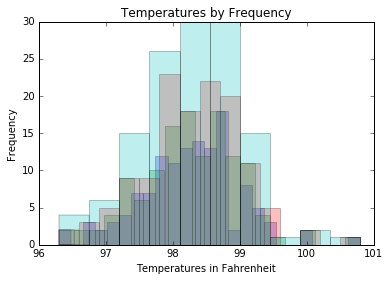

In [30]:
plt.hist(df.temperature, bins=25, alpha=.25)
plt.hist(df.temperature, bins=20, alpha=.25)
plt.hist(df.temperature, bins=15, alpha=.25)
plt.hist(df.temperature, bins=10, alpha=.25)
plt.title("Temperatures by Frequency")
plt.xlabel("Temperatures in Fahrenheit")
plt.ylabel("Frequency")
plt.show()

In [24]:
print stats.kstest(df['temperature'], 'norm')
print stats.normaltest(df['temperature'])

KstestResult(statistic=1.0, pvalue=0.0)
NormaltestResult(statistic=2.7038014333192031, pvalue=0.2587479863488254)


In [36]:
stats.ttest_1samp(df.temperature, 98.6)

Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)

In [39]:
tempm = np.mean(df.temperature)
tempstd = np.std(df.temperature, ddof=1)
print stats.norm.interval(.95, tempm, tempstd)
print stats.norm.interval(.99, tempm, tempstd)

(96.812218185403111, 99.686243353058444)
(96.360676105885531, 100.13778543257602)


In [54]:
groups = df.groupby(['gender'])
fs = groups.get_group('F')
ms = groups.get_group('M')

In [56]:
print stats.ttest_ind(fs.temperature,ms.temperature)

Ttest_indResult(statistic=2.2854345381656103, pvalue=0.023931883122395609)
